<h4>Предсказание стоимости аренды в зависимости от площади</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe =  pd.read_csv("Rent.csv")
dataframe.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


<h4>Отсортируем данные для корректного отображения графика</h4>

In [3]:
sortedDataFrame = dataframe.sort_values(by=["area", "rent"])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(sortedDataFrame['area'], sortedDataFrame['rent'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

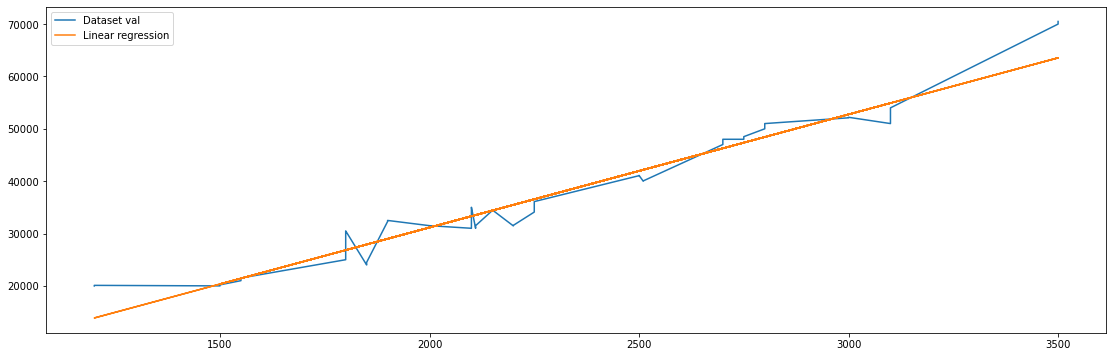

In [5]:
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sortedDataFrame['area'], sortedDataFrame['rent'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
#ax.plot(X_test, model.predict(X_test), label='Prediction')
ax.legend()
plt.show()

<h4>Посчитаем ошибки</h4>

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 2317.013950529136
MSE = 8389941.221863575
